In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time 
import math

sns.set_style("darkgrid")

from IPython.display import clear_output

start = time.time()

In [2]:
data_folder = "prepared_data"
destination_folder = "EDA_figures"
local_directory = os.getcwd()

if data_folder not in os.listdir(local_directory):
    print(data_folder, os.listdir(local_directory))
    raise Exception(f"{data_folder} folder not found, please create it first.")
    
filename_list = os.listdir(local_directory+"\\"+data_folder)
if len(filename_list) < 0:
    raise Exception(f"Required files not present in {data_folder}")
    
if destination_folder in os.listdir(local_directory):
    confirm = input(f"{destination_folder} already exists!, are you sure you want to run the code again?\nY/N:")
    if confirm.upper() != 'Y':
        raise SystemExit("Cancelling runtime!")

# Load the prepared data

In [3]:
df_list = []
df_dict = {}
merged_df = pd.read_csv(local_directory+"\\"+data_folder+"\\"+"merged_disease_data.csv",index_col=0)

for i, filename in enumerate(filename_list):
    clear_output(wait=True)
    
    print(f"Files read/Total files: {i+1}/{len(filename_list)}")
    df_name = filename.split('.')[0].lower()
    print(f"Reading: {filename}")
    
    if (df_name=='merged_disease_data'):
        continue
    
    df = pd.read_csv(local_directory+"\\"+data_folder+"\\"+filename,index_col=0)
    df_list.append(df_name)
    df_dict[df_name] = df
    globals()[df_name] = df

print("done! \nfiles loaded:")
df_list

Files read/Total files: 10/10
Reading: TYPHOID FEVER.csv
done! 
files loaded:


['acute bloody diarrhea',
 'chikunguya viral disease',
 'cholera',
 'dengue fever',
 'hepatitis a',
 'leptospirosis',
 'rabies',
 'rotaviral enteritis',
 'typhoid fever']

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19191 entries, 0 to 19190
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 19191 non-null  int64  
 1   week                 19191 non-null  int64  
 2   month                19191 non-null  int64  
 3   adm3_pcode           19191 non-null  object 
 4   adm3_en              19191 non-null  object 
 5   tave                 19191 non-null  float64
 6   tmin                 19191 non-null  float64
 7   tmax                 19191 non-null  float64
 8   heat_index           19191 non-null  float64
 9   pr                   19191 non-null  float64
 10  wind_speed           19191 non-null  float64
 11  rh                   19191 non-null  float64
 12  solar_rad            19191 non-null  float64
 13  uv_rad               19191 non-null  float64
 14  clinic_nearest       12450 non-null  float64
 15  dentist_nearest      12450 non-null  floa

# Correlation Map    

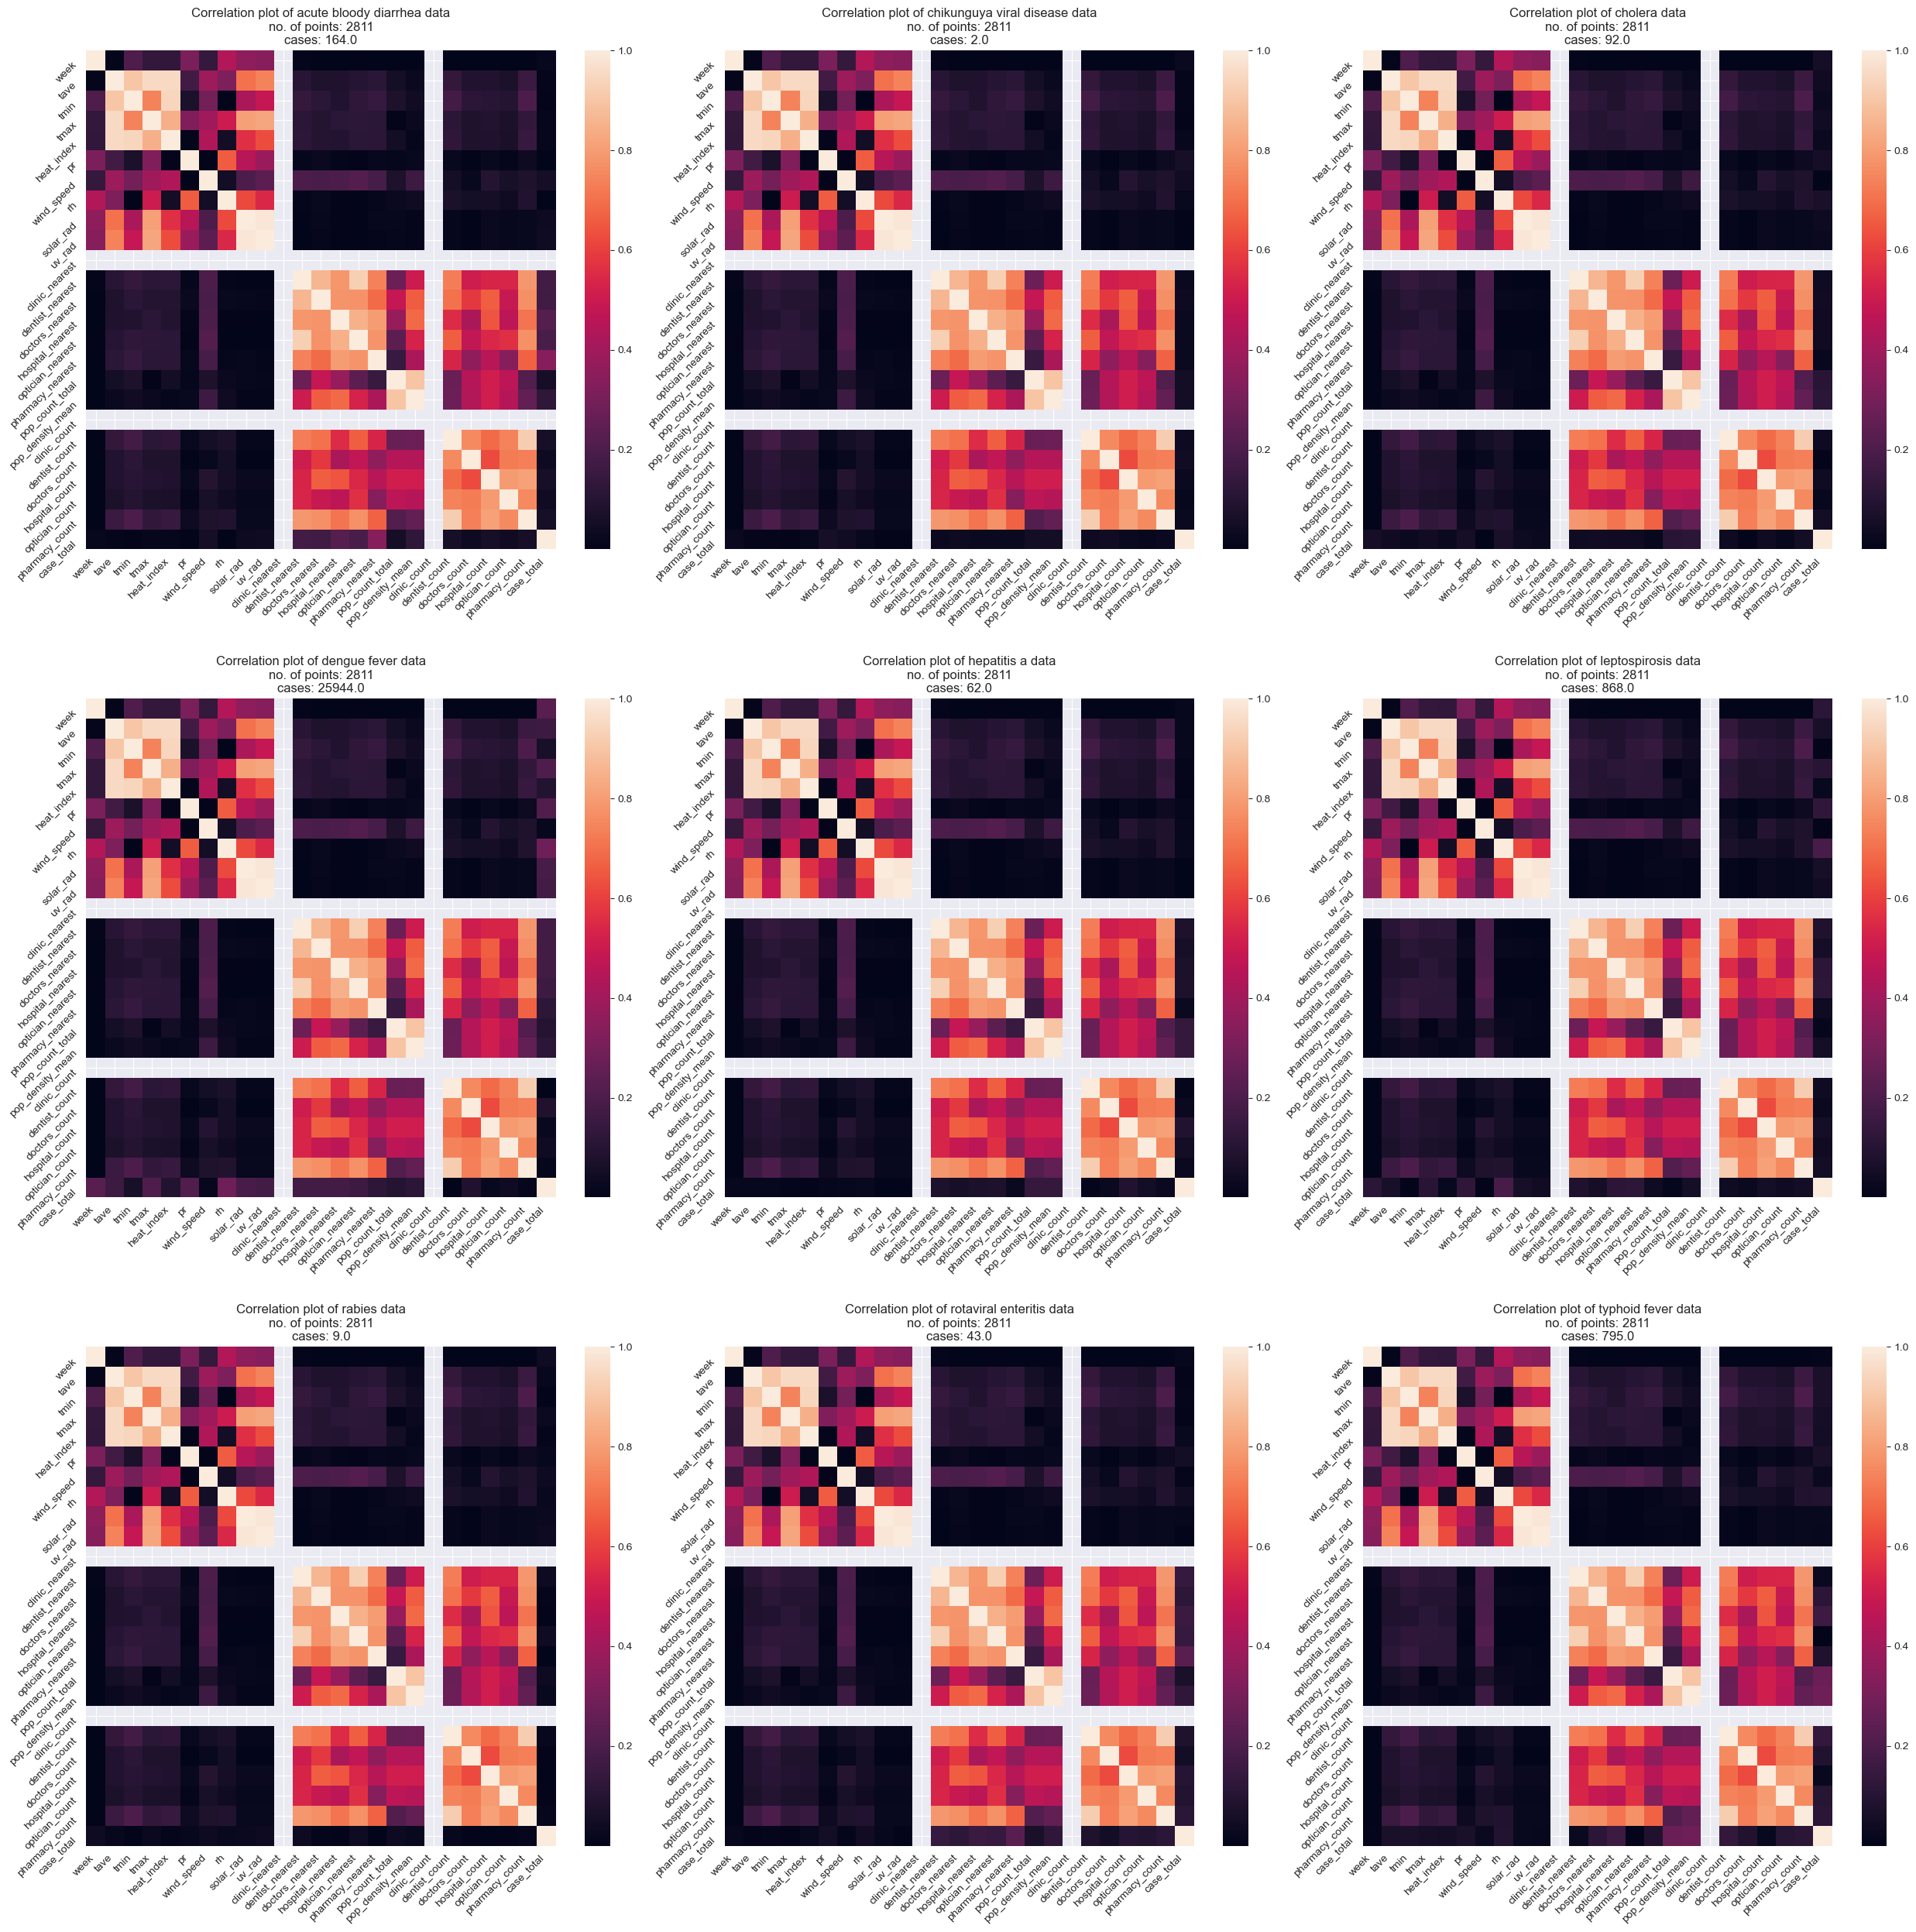

In [5]:
r = math.ceil(len(df_list)/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = df_list

for x in range(r):
    for y in range(c):
        index = (y+x*3)
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        heatmap_data = df_dict[disease].drop(['year','month','adm3_pcode','adm3_en'],axis=1).corr()
        heatmap_data = heatmap_data.apply(lambda i: abs(i))
        sns.heatmap(heatmap_data, vmax=1, ax=ax[x, y])
        ax[x, y].set_xticks(ax[x, y].get_xticks(),rotation=45,labels=ax[x, y].get_xticklabels(),ha='right',va='top')
        ax[x, y].set_yticks(ax[x, y].get_yticks(),rotation=45,labels=ax[x, y].get_yticklabels(),ha='right',va='top')
        ax[x, y].set_title(f"Correlation plot of {disease} data\nno. of points: {len(df_dict[disease])}\ncases: {df_dict[disease]['case_total'].sum()}")
        ax[x, y].plot()

# Year-month case rates for every disease

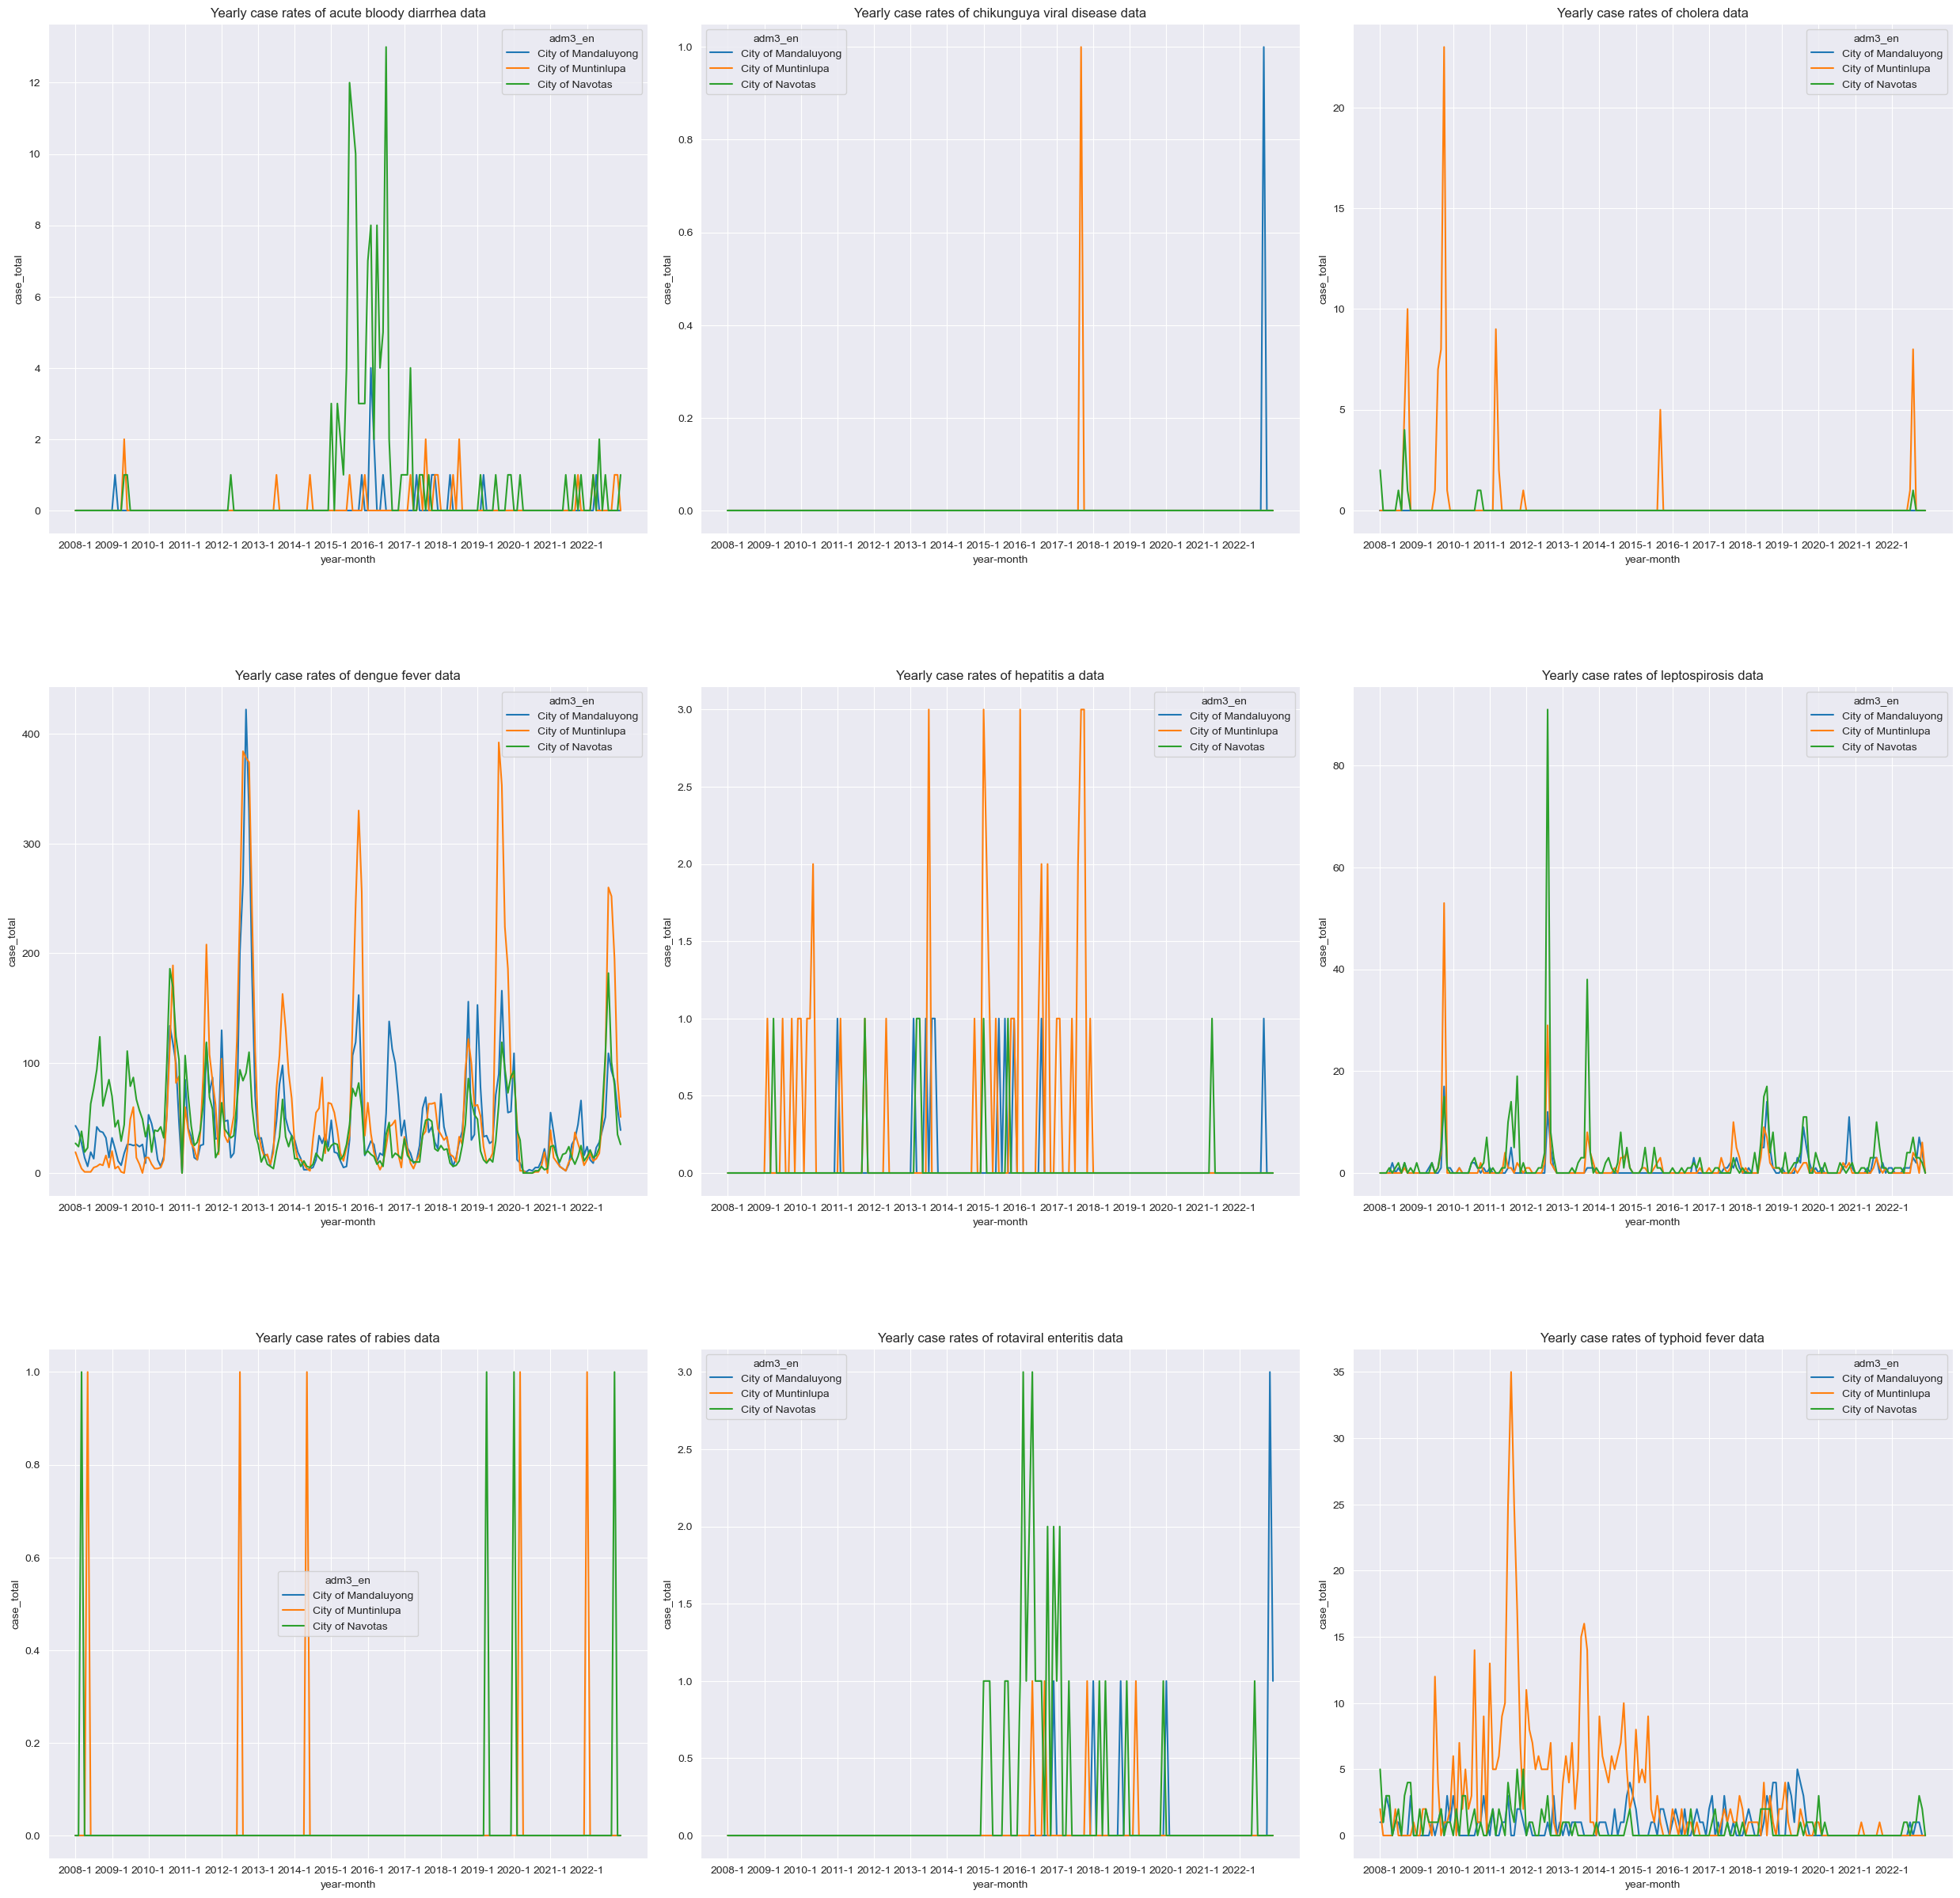

In [6]:
r = math.ceil(len(df_dict.keys())/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        index = (y+x*3)
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        data = df_dict[disease]
        data = data.groupby(by=["year",'month',"adm3_en"]).sum().reset_index()
        data['year-month'] = data.apply(lambda x: f"{x['year']}-{x['month']}", axis = 1)

        sns.lineplot(data, x='year-month', y='case_total', hue='adm3_en', ax=ax[x, y])
        ax[x, y].set_title(f"Yearly case rates of {disease} data")
        ax[x, y].set_xticks(ax[x, y].get_xticks()[::12])
        ax[x, y].plot()

# Dengue comparison over temperature

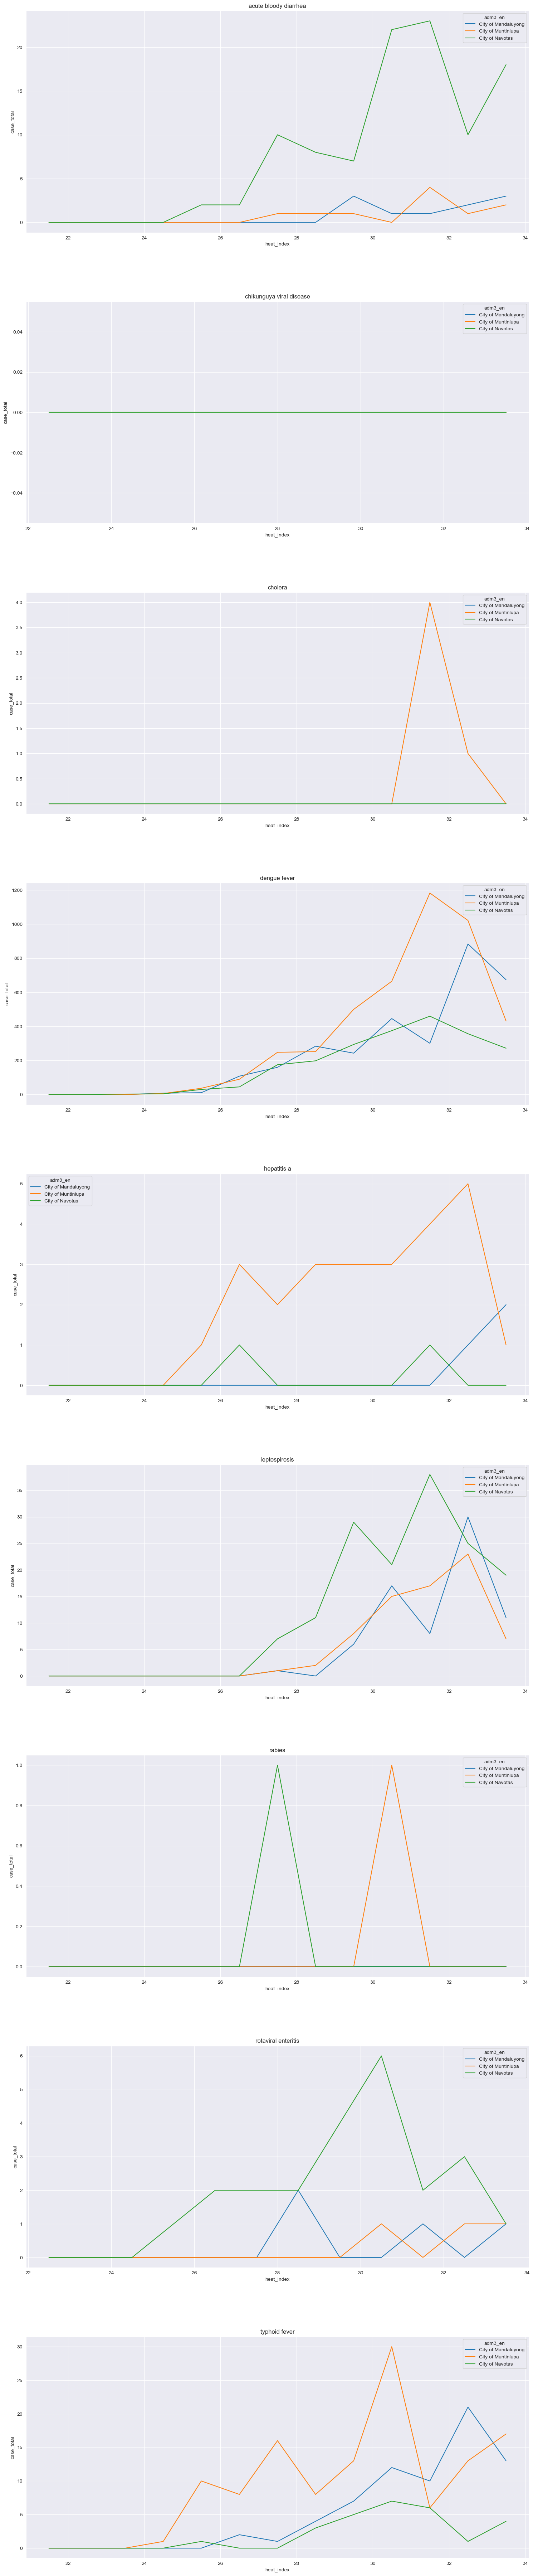

In [12]:
compare_columns = [
    'heat_index'
]

r = math.ceil(len(df_dict.keys()))
c = len(compare_columns)
fig, ax = plt.subplots(r, c, figsize=(15,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    disease = disease_keys[x]
    for y in range(c):
        compare = compare_columns[y]
        df = df_dict[disease]
        df = df.dropna()
        steps = 15
        minimum = int(df.tmin.min())
        maximum = int(df.tmax.max())
        interval = 1

        data = df.groupby([pd.cut(df[compare], np.arange(minimum, maximum, interval)),'adm3_en'])['case_total'].sum().reset_index()
        data[compare] = data.apply(lambda x: x[compare].mid, axis=1)
        sns.lineplot(data, x=compare, y='case_total', hue='adm3_en', ax=ax[x])
        ax[x].set_title(f"{disease}")

# Scatter plot of Dengue case totals vs heat_index

      year  week  month   adm3_pcode              adm3_en       tave  \
1128  2014     1     12  PH137401000  City of Mandaluyong  25.300000   
1129  2014     1     12  PH137503000      City of Navotas  25.273333   
1130  2014     1     12  PH137603000   City of Muntinlupa  25.026158   
1131  2014     2      1  PH137401000  City of Mandaluyong  26.368571   
1132  2014     2      1  PH137503000      City of Navotas  25.800000   
...    ...   ...    ...          ...                  ...        ...   
2434  2020    52     12  PH137503000      City of Navotas  27.490000   
2435  2020    52     12  PH137603000   City of Muntinlupa  27.152387   
2436  2020    53     12  PH137401000  City of Mandaluyong  27.312500   
2437  2020    53     12  PH137503000      City of Navotas  27.257500   
2438  2020    53     12  PH137603000   City of Muntinlupa  27.045696   

           tmin       tmax  heat_index         pr  ...  pharmacy_nearest  \
1128  23.813333  27.223333   26.153333   4.906393  ...     

      year  week  month   adm3_pcode              adm3_en       tave  \
1314  2015     2      1  PH137401000  City of Mandaluyong  25.375714   
1315  2015     2      1  PH137503000      City of Navotas  25.267143   
1316  2015     2      1  PH137603000   City of Muntinlupa  25.106991   
1317  2015     3      1  PH137401000  City of Mandaluyong  25.030000   
1318  2015     3      1  PH137503000      City of Navotas  24.810000   
...    ...   ...    ...          ...                  ...        ...   
2434  2020    52     12  PH137503000      City of Navotas  27.490000   
2435  2020    52     12  PH137603000   City of Muntinlupa  27.152387   
2436  2020    53     12  PH137401000  City of Mandaluyong  27.312500   
2437  2020    53     12  PH137503000      City of Navotas  27.257500   
2438  2020    53     12  PH137603000   City of Muntinlupa  27.045696   

           tmin       tmax  heat_index         pr  ...  pharmacy_nearest  \
1314  23.147143  28.331429   26.457143   0.000000  ...     

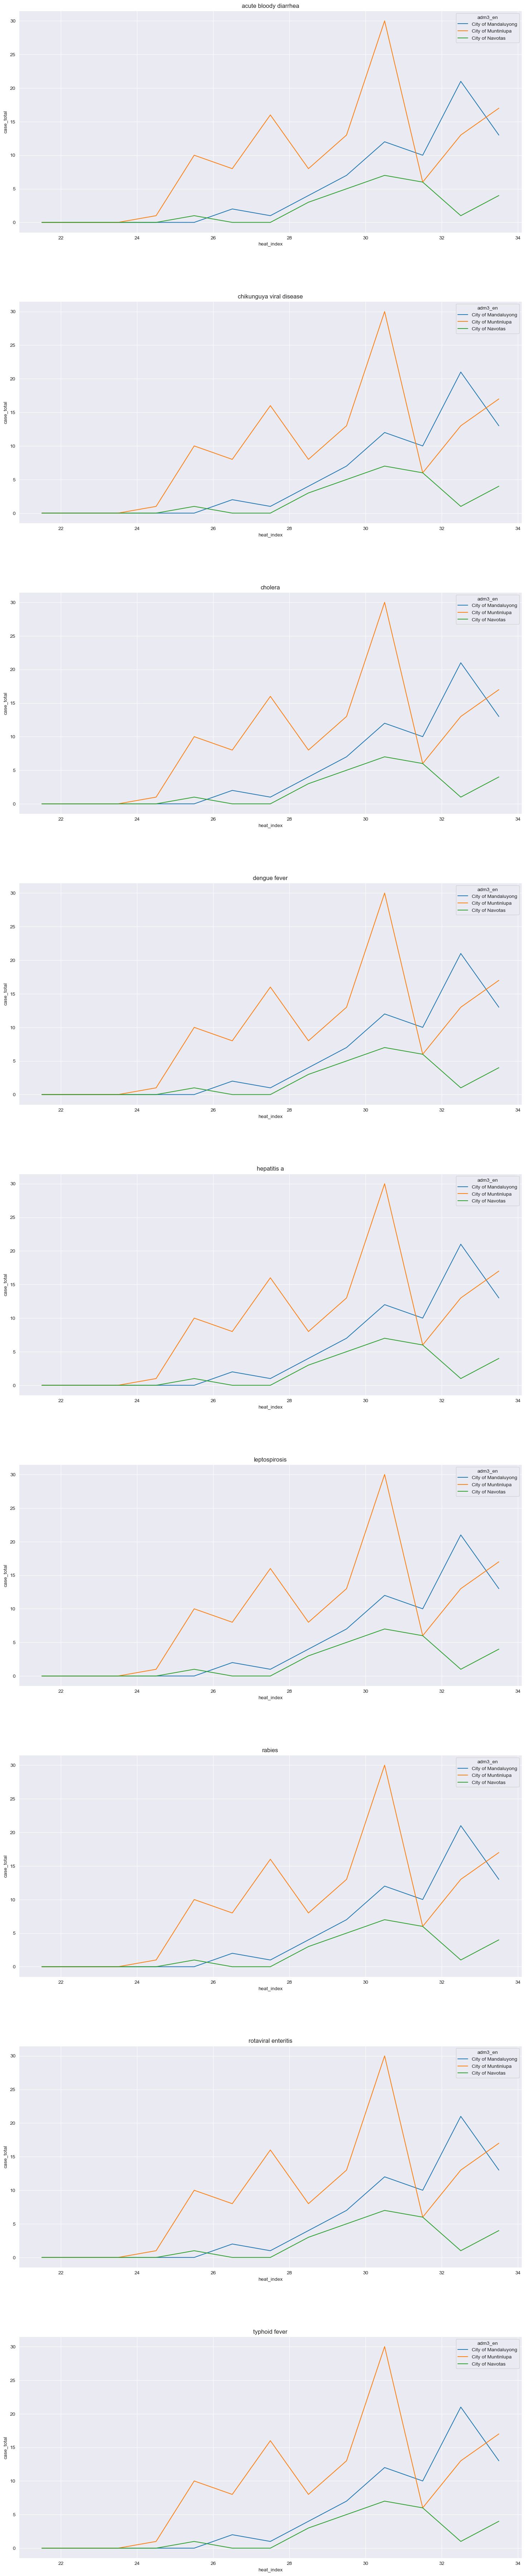

In [19]:
compare_columns = [
    'heat_index'
]

r = math.ceil(len(df_dict.keys()))
c = len(compare_columns)
fig, ax = plt.subplots(r, c, figsize=(15,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    disease = disease_keys[x]
    for y in range(c):
        compare = compare_columns[y]
        df = df_dict[disease]
        df = df.dropna()
        print(df)
        
        sns.lineplot(data, x=compare, y='case_total', hue='adm3_en', ax=ax[x])
        ax[x].set_title(f"{disease}")

In [15]:
stop = time.time()
print(f"Total execution time: {time.strftime('%H:%M:%S', time.gmtime(stop-start))}")

Total execution time: 00:16:59
